Total Circles Detected: 20
Total Blue Circles Detected: 7


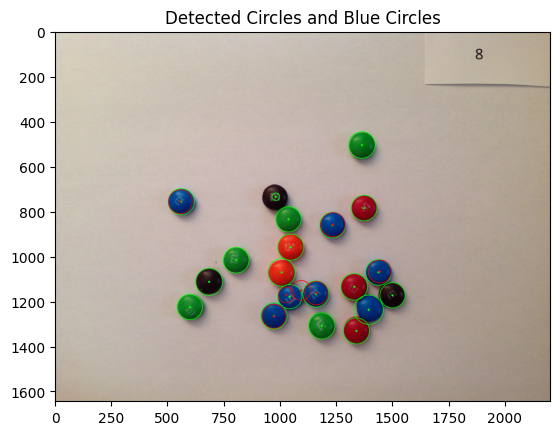

Total Circles Detected: 20
Total Blue Circles Detected: 6


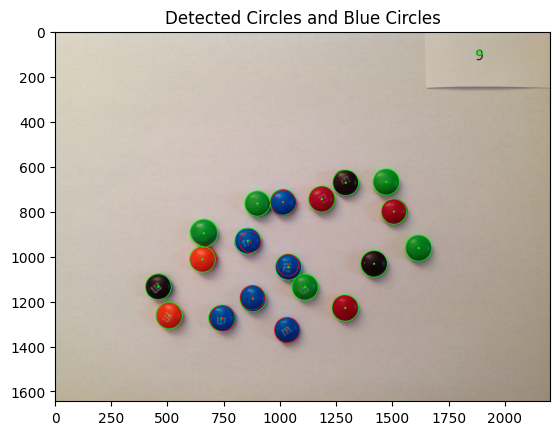

Total Circles Detected: 6
Total Blue Circles Detected: 4


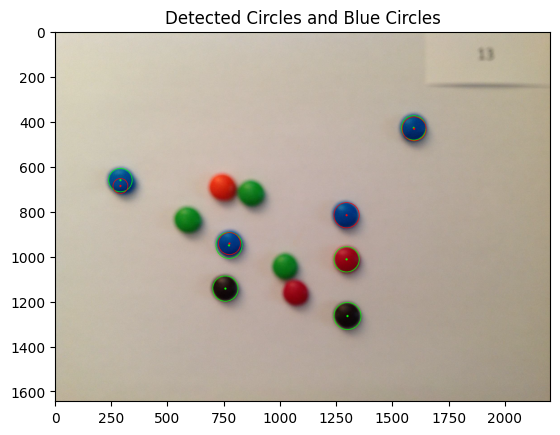

Total Circles Detected: 22
Total Blue Circles Detected: 7


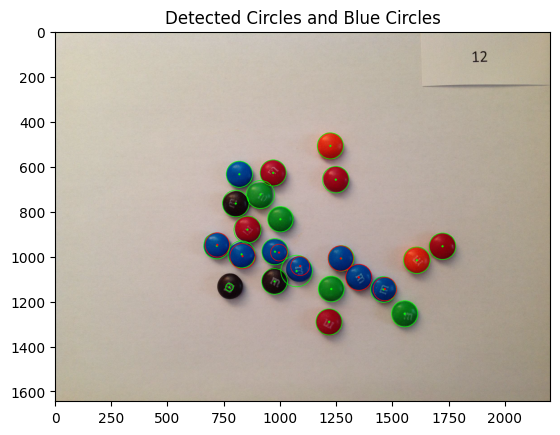

Total Circles Detected: 20
Total Blue Circles Detected: 8


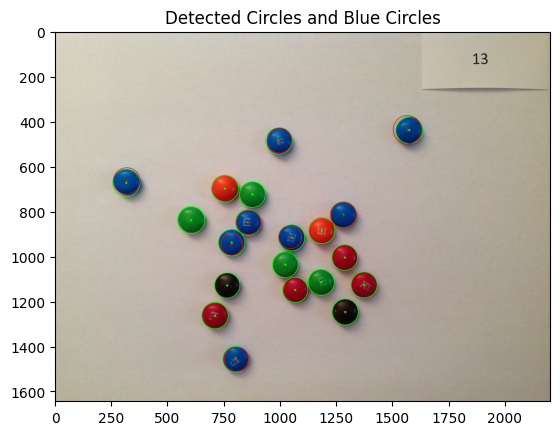

Total Circles Detected: 23
Total Blue Circles Detected: 8


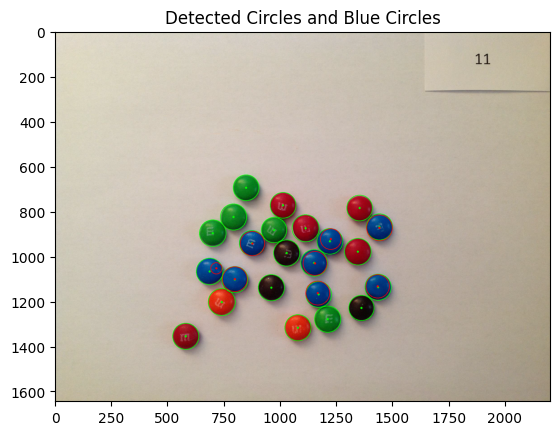

Total Circles Detected: 20
Total Blue Circles Detected: 6


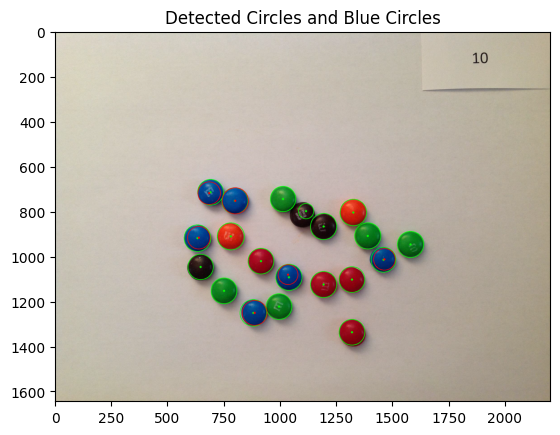

Total Circles Detected: 30
Total Blue Circles Detected: 8


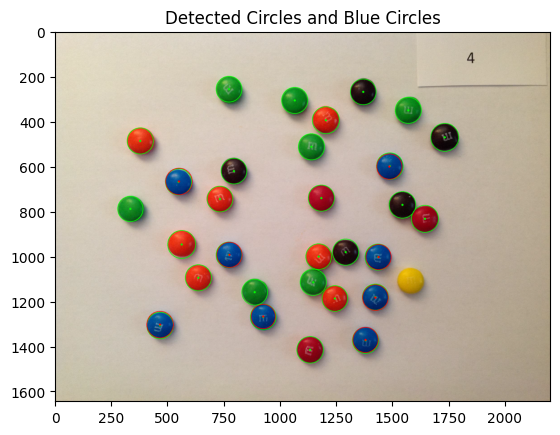

Total Circles Detected: 20
Total Blue Circles Detected: 7


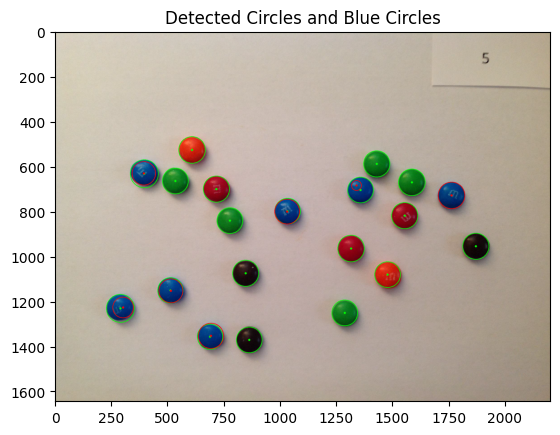

Total Circles Detected: 21
Total Blue Circles Detected: 6


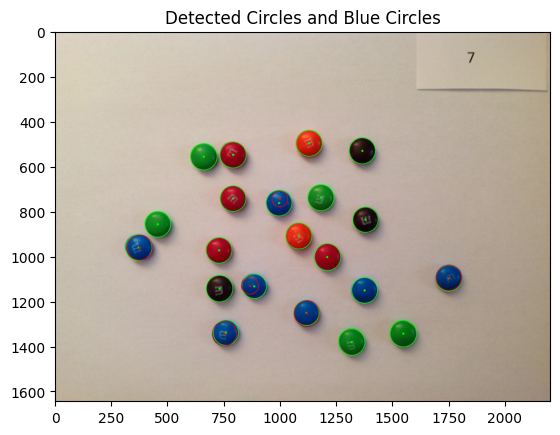

Total Circles Detected: 25
Total Blue Circles Detected: 9


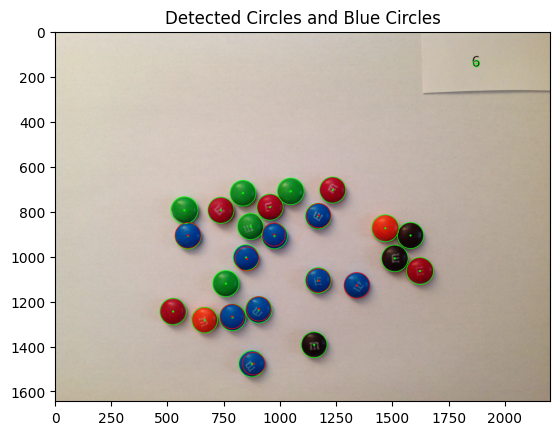

Total Circles Detected: 35
Total Blue Circles Detected: 7


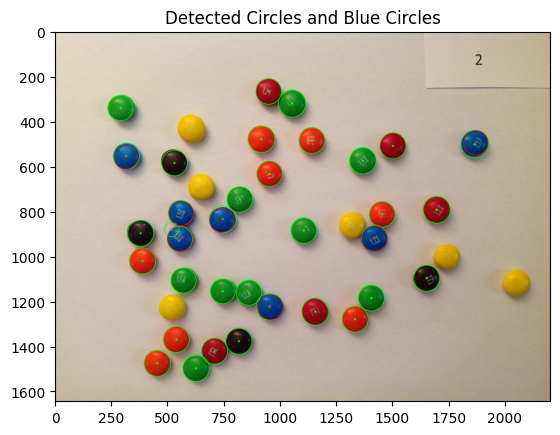

Total Circles Detected: 26
Total Blue Circles Detected: 5


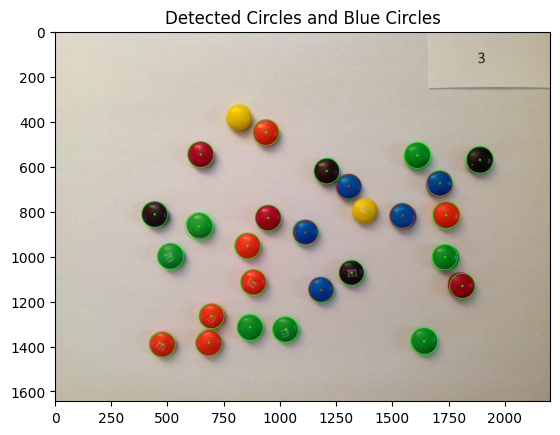

Total Circles Detected: 45
Total Blue Circles Detected: 11


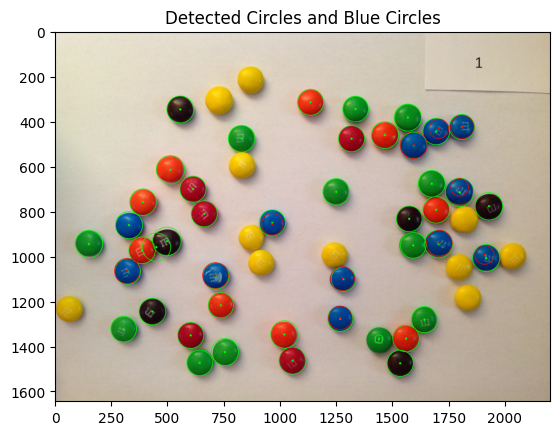

Total Circles Detected: 41
Total Blue Circles Detected: 11


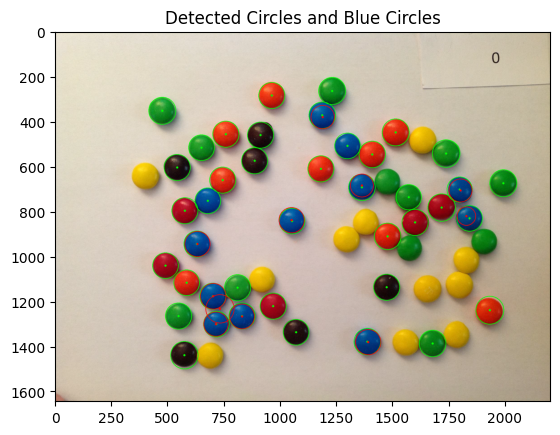

In [127]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


#img = cv2.imread('/Users/zeyadhassan/Desktop/Programming ass (digital image)/CS455-Programming Assignment/10.png') # road.png is the filename

directory = '/Users/zeyadhassan/Desktop/Programming ass (digital image)/CS455-Programming Assignment/'
#img = cv2.imread('/Users/zeyadhassan/Desktop/Programming ass (digital image)/CS455-Programming Assignment/14.png')

image_files = [f for f in os.listdir(directory) if f.endswith('.png')]

# total_circles = 0
# total_blue_circles = 0

for image_file in image_files:
    
    image_path = os.path.join(directory, image_file)

    
    img = cv2.imread(image_path)
    


    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #([86, 31, 4], [220, 88, 50]),
    blue_0 = np.array([86, 31, 4])
    blue_1 = np.array([220, 88, 50])

    mask_blue = cv2.inRange(img, blue_0, blue_1)

    blue_regions = cv2.bitwise_and(img, img, mask=mask_blue)

    gray_blue = cv2.cvtColor(blue_regions, cv2.COLOR_BGR2GRAY)

    img_blur = cv2.medianBlur(gray_blue, 5)

    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, img.shape[0]/32, param1=100, param2=30, minRadius=10, maxRadius=130)
    
    # if circles_blue is not None:
    #     total_blue_circles += circles_blue.shape[1]
    
    circles_blue = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/32, param1=100, param2=30, minRadius=10, maxRadius=130)
    
    # if circles is not None:
    #     total_circles += circles.shape[1]


    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(img, (i[0], i[1]), 2, (0, 255, 0), 5)

    if circles_blue is not None:
        circles_blue = np.uint16(np.around(circles_blue))
        for i in circles_blue[0,:]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 2)
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 5)
   
    
    # elif circles is not None:
    #     circles = np.uint16(np.around(circles))
    #     for i in circles[0, :]:
    #         cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)



    if circles is not None:
        print("Total Circles Detected:", circles.shape[1])
    else:
        print("No circles detected.")

    if circles_blue is not None:
        print("Total Blue Circles Detected:", circles_blue.shape[1])
    else:
        print("No blue circles detected.")
        
        
    # print("Total Circles Detected:", total_circles)
    # print("Total Blue Circles Detected:", total_blue_circles)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Circles and Blue Circles')
    plt.show()        
    # plt.imshow(img)